In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_phishing.csv")

In [ ]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
df['status'].value_counts()

status
legitimate    5715
phishing      5715
Name: count, dtype: int64

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['labels'] = le.fit_transform(df['status'])

In [ ]:
df[['status','labels']].head(10)

,status,labels
0,legitimate,0
1,phishing,1
2,phishing,1
3,legitimate,0
4,legitimate,0
5,phishing,1
6,legitimate,0
7,phishing,1
8,legitimate,0
9,legitimate,0


In [ ]:
Y = df['labels']
X = df['url']

In [ ]:
X.head(4)

0                http://www.crestonwood.com/router.php
1    http://shadetreetechnology.com/V4/validation/a...
2    https://support-appleld.com.secureupdate.duila...
3                                   http://rgipt.ac.in
Name: url, dtype: object

In [ ]:
Y.head(4)

0    0
1    1
2    1
3    0
Name: labels, dtype: int64

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
def get_conf_matrix(X_test, Y_test, model):
  Y_pred = model.predict(X_test)
  Y_pred = Y_pred > 0.5
  cm = confusion_matrix(Y_test,Y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot(cmap = plt.cm.YlGn)
  plt.title('Confusion Matrix')
  plt.show()

In [ ]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
ps = PorterStemmer()
corpus_train = []

def albumentations(X,corpus_t):
    for i in range(len(X)):
        review = re.sub("[^a-zA-Z]"," ",X[i])
        review = review.lower()
        review = review.split()
        review = [ps.stem(word) for word in review if word not in set(stopwords.words("english"))]
        review = " ".join(review)
        corpus_t.append(review)

In [ ]:
albumentations(X,corpus_train)

In [ ]:
corpus_train[:4]

['http www crestonwood com router php',
 'http shadetreetechnolog com v valid aedc ae eabcfa e',
 'http support appleld com secureupd duilawyeryork com ap e b b b cmd updat dispatch e b b b b local',
 'http rgipt ac']

In [ ]:
vectorizer = TfidfVectorizer(max_features = 1000)

In [ ]:
X1 = vectorizer.fit_transform(corpus_train).toarray()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X1, Y, stratify = Y, test_size = 0.2, random_state = 42)

In [ ]:
X_train = np.expand_dims(X_train, axis = -1)
X_test = np.expand_dims(X_test, axis = -1)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(9144, 1000, 1) (9144,)
(2286, 1000, 1) (2286,)


In [ ]:
input_size = X_train[2].shape
print(input_size)

(1000, 1)


In [ ]:
def eval_graph(results):
    acc = results.history['accuracy']
    val_acc = results.history['val_accuracy']
    epochs = range(len(acc))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,acc,'r',label="Training Accuracy")
    plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
    plt.legend(loc='upper left')
    plt.title("ACCURACY GRAPH")
    plt.show()
    loss = results.history['loss']
    val_loss = results.history['val_loss']
    epochs = range(len(loss))
    fig = plt.figure(figsize=(14,7))
    plt.plot(epochs,loss,'r',label="Training loss")
    plt.plot(epochs,val_loss,'b',label="Validation loss")
    plt.legend(loc='upper left')
    plt.title("LOSS GRAPH")
    plt.show()

### **CNN MODEL**

In [ ]:
import tensorflow as tf
cnnModel = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=input_size),
    tf.keras.layers.Conv1D(filters=16,kernel_size=3,activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2, padding = 'same'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(input_shape=input_size),
    tf.keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2, padding = 'same'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(input_shape=input_size),
    tf.keras.layers.Conv1D(filters=64,kernel_size=3,activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2, padding = 'same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
cnnModel.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 1000, 1)           4         
 Normalization)                                                  
                                                                 
 conv1d (Conv1D)             (None, 1000, 16)          64        
                                                                 
 batch_normalization_1 (Bat  (None, 1000, 16)          64        
 chNormalization)                                                
                                                                 
 max_pooling1d (MaxPooling1  (None, 500, 16)           0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 500, 16)           0         
                                                        

In [ ]:
cnnModel.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
)
cnnHistory = cnnModel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
72/72 [==============================] - 11s 29ms/step - loss: 0.7947 - binary_accuracy: 0.7733 - val_loss: 0.6927 - val_binary_accuracy: 0.6395
Epoch 2/200
72/72 [==============================] - 1s 16ms/step - loss: 0.3729 - binary_accuracy: 0.8406 - val_loss: 0.6916 - val_binary_accuracy: 0.5009
Epoch 3/200
72/72 [==============================] - 1s 16ms/step - loss: 0.3245 - binary_accuracy: 0.8644 - val_loss: 0.6914 - val_binary_accuracy: 0.5066
Epoch 4/200
72/72 [==============================] - 1s 17ms/step - loss: 0.2803 - binary_accuracy: 0.8792 - val_loss: 0.6860 - val_binary_accuracy: 0.5127
Epoch 5/200
72/72 [==============================] - 1s 17ms/step - loss: 0.2598 - binary_accuracy: 0.8944 - val_loss: 0.6651 - val_binary_accuracy: 0.7992
Epoch 6/200
72/72 [==============================] - 1s 16ms/step - loss: 0.2452 - binary_accuracy: 0.8995 - val_loss: 0.6024 - val_binary_accuracy: 0.8981
Epoch 7/200
72/72 [==============================] - 1s 17ms/st

Best Validation Loss: 0.2080


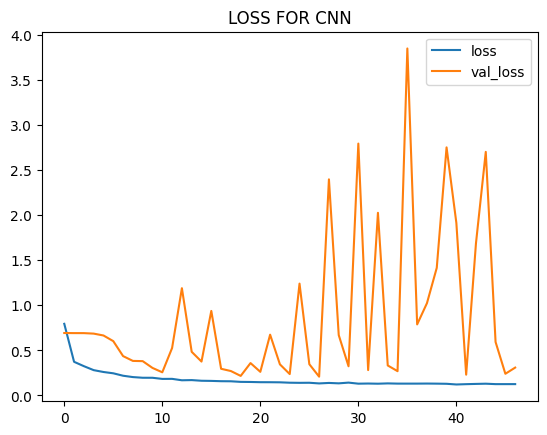

In [ ]:
history_df = pd.DataFrame(cnnHistory.history)
history_df.loc[0:, ['loss', 'val_loss']].plot(title='LOSS FOR CNN')
print(("Best Validation Loss: {:0.4f}"
      .format(history_df['val_loss'].min())))


Best Validation Accuracy: 0.9256


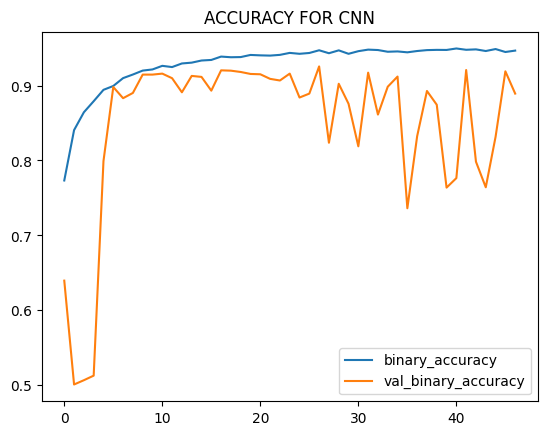

In [ ]:
history_df.loc[0:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="ACCURACY FOR CNN")
print("\nBest Validation Accuracy: {:0.4f}".format(history_df['val_binary_accuracy'].max()))

72/72 [==============================] - 1s 5ms/step


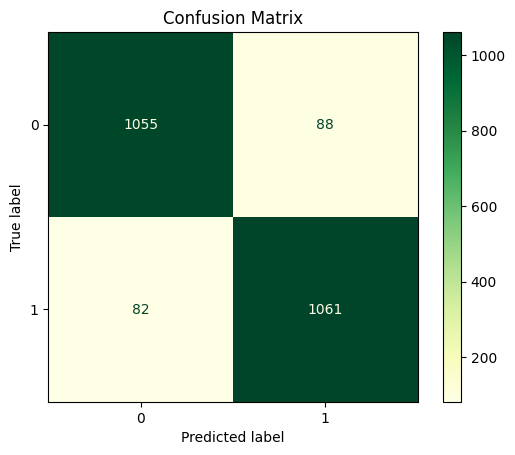

In [ ]:
get_conf_matrix(X_test,y_test,cnnModel)

In [ ]:
import tensorflow as tf
lstmModel = tf.keras.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=input_size),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64, return_sequences=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

In [ ]:
lstmModel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_6 (Bat  (None, 1000, 1)           4         
 chNormalization)                                                
                                                                 
 lstm (LSTM)                 (None, 1000, 128)         66560     
                                                                 
 batch_normalization_7 (Bat  (None, 1000, 128)         512       
 chNormalization)                                                
                                                                 
 dropout_4 (Dropout)         (None, 1000, 128)         0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 batch_normalization_8 (Bat  (None, 64)               

In [ ]:
lstmModel.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
    monitor='val_loss'
)
lstmHistory = lstmModel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
72/72 [==============================] - 27s 171ms/step - loss: 0.7240 - accuracy: 0.6462 - val_loss: 0.6962 - val_accuracy: 0.5000
Epoch 2/200
72/72 [==============================] - 10s 141ms/step - loss: 0.6154 - accuracy: 0.7093 - val_loss: 0.7095 - val_accuracy: 0.5000
Epoch 3/200
72/72 [==============================] - 8s 116ms/step - loss: 0.5889 - accuracy: 0.7339 - val_loss: 0.7235 - val_accuracy: 0.5022
Epoch 4/200
72/72 [==============================] - 9s 123ms/step - loss: 0.5627 - accuracy: 0.7481 - val_loss: 0.7500 - val_accuracy: 0.5070
Epoch 5/200
72/72 [==============================] - 9s 122ms/step - loss: 0.5520 - accuracy: 0.7521 - val_loss: 0.6632 - val_accuracy: 0.5923
Epoch 6/200
72/72 [==============================] - 8s 116ms/step - loss: 0.5410 - accuracy: 0.7592 - val_loss: 0.6281 - val_accuracy: 0.6487
Epoch 7/200
72/72 [==============================] - 9s 126ms/step - loss: 0.5325 - accuracy: 0.7629 - val_loss: 0.6231 - val_accuracy: 0.66

Best Validation Loss: 0.5070


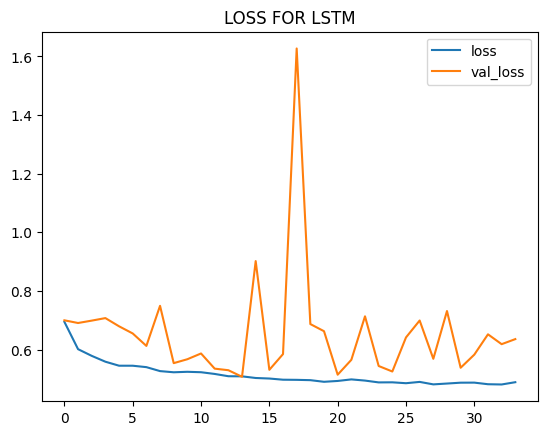

In [ ]:
history_df = pd.DataFrame(lstmHistory.history)
history_df.loc[0:, ['loss', 'val_loss']].plot(title='LOSS FOR LSTM')
print(("Best Validation Loss: {:0.4f}"
      .format(history_df['val_loss'].min())))


Best Validation Accuracy: 0.7830


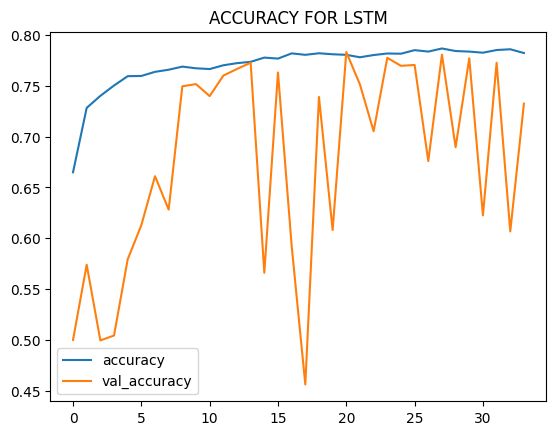

In [ ]:
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot(title="ACCURACY FOR LSTM")
print("\nBest Validation Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()))

72/72 [==============================] - 3s 26ms/step


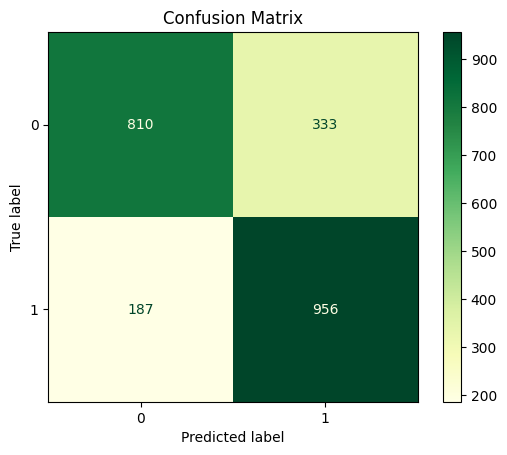

In [ ]:
get_conf_matrix(X_test,y_test,lstmModel)

In [ ]:
import tensorflow as tf
lstmCNNModel = tf.keras.Sequential([
     tf.keras.layers.BatchNormalization(input_shape=input_size),
    tf.keras.layers.Conv1D(filters=16,kernel_size=3,activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2, padding = 'same'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(input_shape=input_size),
    tf.keras.layers.Conv1D(filters=32,kernel_size=3,activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2, padding = 'same'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.BatchNormalization(input_shape=input_size),
    tf.keras.layers.Conv1D(filters=64,kernel_size=3,activation='relu', padding='same'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling1D(pool_size=2, padding = 'same'),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.LSTM(64, return_sequences=True),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1, activation='sigmoid'),

])

In [ ]:
lstmCNNModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_11 (Ba  (None, 1000, 1)           4         
 tchNormalization)                                               
                                                                 
 conv1d_3 (Conv1D)           (None, 1000, 16)          64        
                                                                 
 batch_normalization_12 (Ba  (None, 1000, 16)          64        
 tchNormalization)                                               
                                                                 
 max_pooling1d_3 (MaxPoolin  (None, 500, 16)           0         
 g1D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 500, 16)           0         
                                                      

In [ ]:
lstmCNNModel.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy'],
)

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    patience=20,
    min_delta=0.001,
    restore_best_weights=True,
    monitor='val_loss'
)
lstmCNNHistory = lstmCNNModel.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=200,
    callbacks=[early_stopping],
)

Epoch 1/200
72/72 [==============================] - 11s 47ms/step - loss: 0.6443 - accuracy: 0.6692 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/200
72/72 [==============================] - 2s 33ms/step - loss: 0.5363 - accuracy: 0.7387 - val_loss: 0.6881 - val_accuracy: 0.5144
Epoch 3/200
72/72 [==============================] - 3s 39ms/step - loss: 0.4784 - accuracy: 0.7767 - val_loss: 0.6737 - val_accuracy: 0.6330
Epoch 4/200
72/72 [==============================] - 2s 31ms/step - loss: 0.4362 - accuracy: 0.8061 - val_loss: 0.6203 - val_accuracy: 0.7270
Epoch 5/200
72/72 [==============================] - 2s 34ms/step - loss: 0.4099 - accuracy: 0.8190 - val_loss: 0.5327 - val_accuracy: 0.7515
Epoch 6/200
72/72 [==============================] - 2s 32ms/step - loss: 0.3838 - accuracy: 0.8341 - val_loss: 0.4397 - val_accuracy: 0.8176
Epoch 7/200
72/72 [==============================] - 2s 34ms/step - loss: 0.3669 - accuracy: 0.8386 - val_loss: 0.3539 - val_accuracy: 0.8521
Epoch

Best Validation Loss: 0.2343


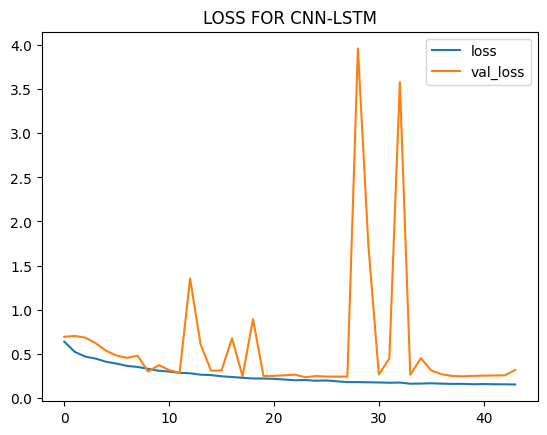

In [ ]:
history_df = pd.DataFrame(lstmCNNHistory.history)
history_df.loc[0:, ['loss', 'val_loss']].plot(title='LOSS FOR CNN-LSTM')
print(("Best Validation Loss: {:0.4f}"
      .format(history_df['val_loss'].min())))


Best Validation Accuracy: 0.9151


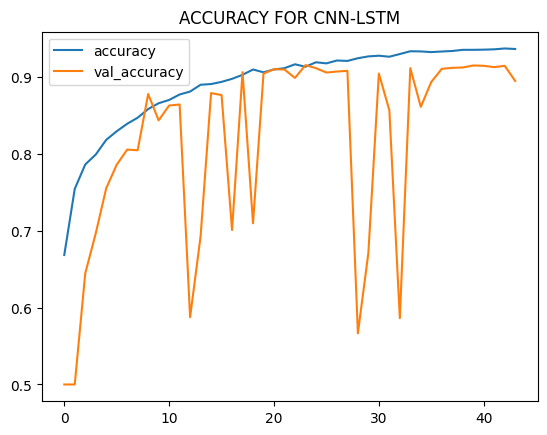

In [ ]:
history_df.loc[0:, ['accuracy', 'val_accuracy']].plot(title="ACCURACY FOR CNN-LSTM")
print("\nBest Validation Accuracy: {:0.4f}".format(history_df['val_accuracy'].max()))

72/72 [==============================] - 2s 9ms/step


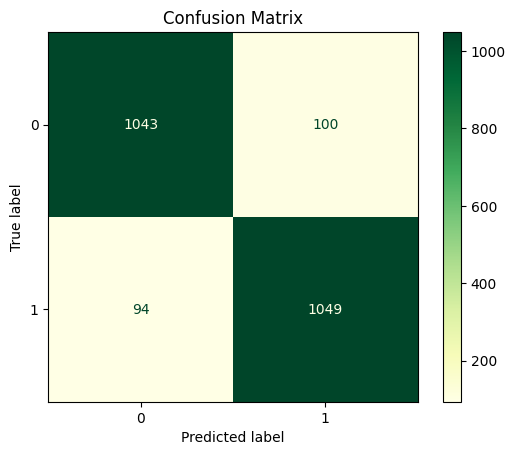

In [ ]:
get_conf_matrix(X_test,y_test,lstmCNNModel)

In [ ]:
from prettytable import PrettyTable
tableSampling = PrettyTable(['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [ ]:
y_pred = lstmCNNModel.predict(X_test)
y_pred = y_pred.round()
accuracy = accuracy_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
precision = precision_score(y_pred, y_test)
f1Score = f1_score(y_pred, y_test)
tableSampling.add_row(['CNN-LSTM Model',
            format(accuracy, ".3f"),
            format(precision, ".3f"),
            format(recall, ".3f"),
            format(f1Score, ".3f")], divider=True)


72/72 [==============================] - 1s 8ms/step


In [ ]:
print(tableSampling)

+----------------+----------+-----------+--------+----------+
|   Model Name   | Accuracy | Precision | Recall | F1-Score |
+----------------+----------+-----------+--------+----------+
|   CNN Model    |  0.926   |   0.928   | 0.923  |  0.926   |
+----------------+----------+-----------+--------+----------+
|   LSTM Model   |  0.804   |   0.847   | 0.780  |  0.812   |
+----------------+----------+-----------+--------+----------+
| CNN-LSTM Model |  0.920   |   0.924   | 0.917  |  0.920   |
+----------------+----------+-----------+--------+----------+


### **MACHINE LEARNING PART**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/dataset_phishing.csv")

In [ ]:
df.head()

,url,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,...,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank,status
0,http://www.crestonwood.com/router.php,37,19,0,3,0,0,0,0,0,...,0,1,0,45,-1,0,1,1,4,legitimate
1,http://shadetreetechnology.com/V4/validation/a...,77,23,1,1,0,0,0,0,0,...,1,0,0,77,5767,0,0,1,2,phishing
2,https://support-appleld.com.secureupdate.duila...,126,50,1,4,1,0,1,2,0,...,1,0,0,14,4004,5828815,0,1,0,phishing
3,http://rgipt.ac.in,18,11,0,2,0,0,0,0,0,...,1,0,0,62,-1,107721,0,0,3,legitimate
4,http://www.iracing.com/tracks/gateway-motorspo...,55,15,0,2,2,0,0,0,0,...,0,1,0,224,8175,8725,0,0,6,legitimate


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['labels'] = le.fit_transform(df['status'])

In [ ]:
df[['status','labels']].head(10)

,status,labels
0,legitimate,0
1,phishing,1
2,phishing,1
3,legitimate,0
4,legitimate,0
5,phishing,1
6,legitimate,0
7,phishing,1
8,legitimate,0
9,legitimate,0


In [ ]:
Y = df['labels']
X = df.drop(columns=['status','labels','url'])

In [ ]:
X.head(4)

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,37,19,0,3,0,0,0,0,0,0,...,0,0,1,0,45,-1,0,1,1,4
1,77,23,1,1,0,0,0,0,0,0,...,0,1,0,0,77,5767,0,0,1,2
2,126,50,1,4,1,0,1,2,0,3,...,0,1,0,0,14,4004,5828815,0,1,0
3,18,11,0,2,0,0,0,0,0,0,...,0,1,0,0,62,-1,107721,0,0,3


In [ ]:
Y.head(4)

0    0
1    1
2    1
3    0
Name: labels, dtype: int64

In [ ]:
scaler = preprocessing.StandardScaler()

In [ ]:
X_scaled = scaler.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, stratify=Y, test_size=0.2, random_state=42)

In [ ]:
X.shape

(11430, 87)

In [ ]:
X_train.shape


(9144, 87)

In [ ]:
X_test.shape

(2286, 87)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [5]:
modelsData = {'Logistic Regression':{'model': LogisticRegression(random_state=42, max_iter=1000)},
              'Support Vector Machine': {'model': SVC(random_state=42)},
              'Gaussian Naive Bayes': {'model': GaussianNB()},
              'K-Neighbors Classifier': {'model': KNeighborsClassifier()},
              'Decision Tree': {'model': DecisionTreeClassifier(random_state=42)},
              'Random Forest': {'model': RandomForestClassifier(random_state=42)},
              'Gradiant Boosting': {'model': GradientBoostingClassifier(random_state=42)},
              'Extreme Gradient Boosting': {'model': XGBClassifier(random_state=42)},
              }

In [17]:
model = GradientBoostingClassifier(random_state=42)
for params in model.get_params():
  print(f"{params}({model.get_params()[params]})", end=", ")

ccp_alpha(0.0), criterion(friedman_mse), init(None), learning_rate(0.1), loss(log_loss), max_depth(3), max_features(None), max_leaf_nodes(None), min_impurity_decrease(0.0), min_samples_leaf(1), min_samples_split(2), min_weight_fraction_leaf(0.0), n_estimators(100), n_iter_no_change(None), random_state(42), subsample(1.0), tol(0.0001), validation_fraction(0.1), verbose(0), warm_start(False), 

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 1000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score, f1_score, ConfusionMatrixDisplay
def trainAndDisplayResults(name, model, X_train, X_test, y_train, y_test, display=True):
    modelClassifier = model['model']
    modelClassifier.fit(X_train, y_train)
    y_pred = modelClassifier.predict(X_test)
    accuracy = accuracy_score(y_pred, y_test)
    recall = recall_score(y_pred, y_test)
    precision = precision_score(y_pred, y_test)
    f1Score = f1_score(y_pred, y_test)
    model['metrics'] = {'accuracy': accuracy, 'recall': recall, 'precision': precision, 'f1score': f1Score}
    if display:
        print(f"\n\nMODEL NAME : {name}\n\n")
        print(f"Accuracy : {accuracy:.4f}")
        print(f"Recall : {recall:.4f}")
        print(f"Precision : {precision:.4f}")
        print(f"F1-Score : {f1Score:.4f}")
        confusionMatrix = confusion_matrix(y_test, y_pred)
        displayCM = ConfusionMatrixDisplay(confusion_matrix=confusionMatrix, display_labels=['Phishing', 'Legitimate'])
        fig, ax = plt.subplots()
        ax.set_title(f"Confusion matrix for {name}")
        fig.set_figwidth(5)
        fig.set_figheight(3)
        displayCM.plot(ax=ax)
        plt.show()
        print("\n\n")



MODEL NAME : Logistic Regression


Accuracy : 0.9361
Recall : 0.9392
Precision : 0.9326
F1-Score : 0.9359


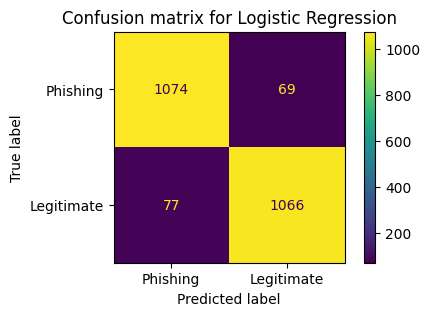






MODEL NAME : Support Vector Machine


Accuracy : 0.9528
Recall : 0.9551
Precision : 0.9501
F1-Score : 0.9526


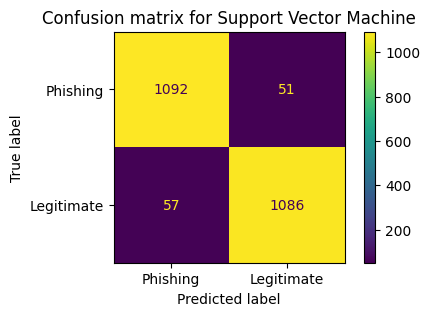






MODEL NAME : Gaussian Naive Bayes


Accuracy : 0.6881
Recall : 0.9424
Precision : 0.4007
F1-Score : 0.5623


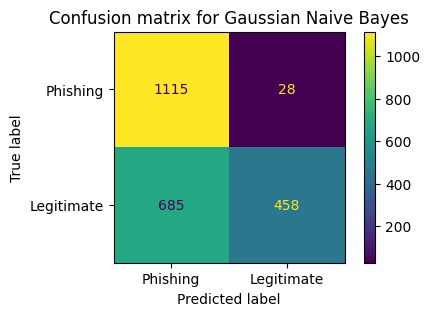






MODEL NAME : K-Neighbors Classifier


Accuracy : 0.9414
Recall : 0.9533
Precision : 0.9283
F1-Score : 0.9406


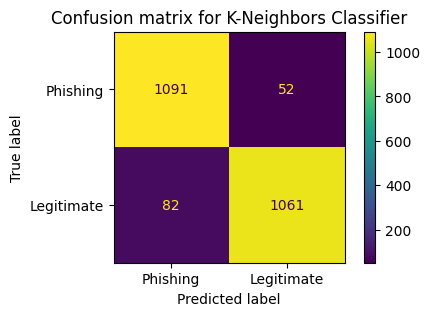






MODEL NAME : Decision Tree


Accuracy : 0.9348
Recall : 0.9307
Precision : 0.9396
F1-Score : 0.9351


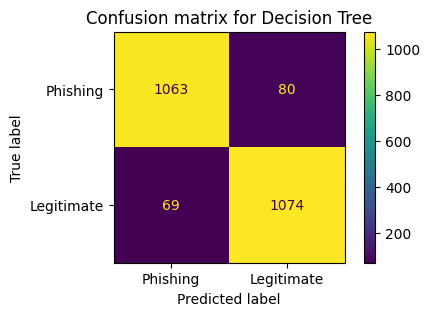






MODEL NAME : Random Forest


Accuracy : 0.9593
Recall : 0.9549
Precision : 0.9641
F1-Score : 0.9595


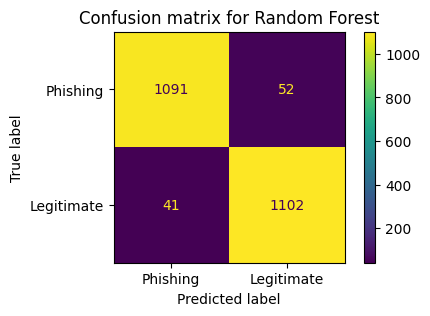






MODEL NAME : Gradiant Boosting


Accuracy : 0.9528
Recall : 0.9488
Precision : 0.9571
F1-Score : 0.9530


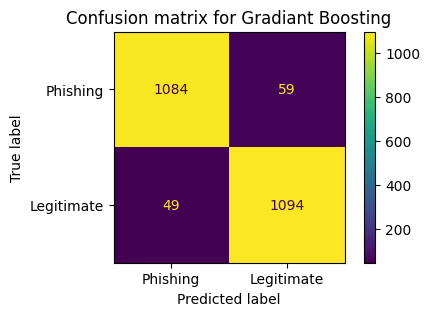






MODEL NAME : Extreme Gradient Boosting


Accuracy : 0.9663
Recall : 0.9611
Precision : 0.9720
F1-Score : 0.9665


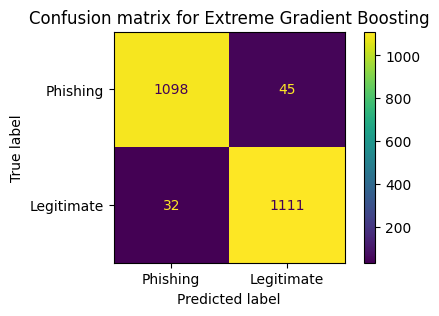

In [ ]:
for model in modelsData:
  trainAndDisplayResults(model, modelsData[model], X_train, X_test, y_train, y_test)

In [ ]:
from prettytable import PrettyTable
tableSampling = PrettyTable(['Model Name', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
for model in modelsData:
    tableSampling.add_row([model,
               format(modelsData[model]['metrics']['accuracy'], ".3f"),
               format(modelsData[model]['metrics']['precision'], ".3f"),
               format(modelsData[model]['metrics']['recall'], ".3f"),
               format(modelsData[model]['metrics']['f1score'], ".3f")], divider=True)
print(tableSampling)

+---------------------------+----------+-----------+--------+----------+
|         Model Name        | Accuracy | Precision | Recall | F1-Score |
+---------------------------+----------+-----------+--------+----------+
|    Logistic Regression    |  0.936   |   0.933   | 0.939  |  0.936   |
+---------------------------+----------+-----------+--------+----------+
|   Support Vector Machine  |  0.953   |   0.950   | 0.955  |  0.953   |
+---------------------------+----------+-----------+--------+----------+
|    Gaussian Naive Bayes   |  0.688   |   0.401   | 0.942  |  0.562   |
+---------------------------+----------+-----------+--------+----------+
|   K-Neighbors Classifier  |  0.941   |   0.928   | 0.953  |  0.941   |
+---------------------------+----------+-----------+--------+----------+
|       Decision Tree       |  0.935   |   0.940   | 0.931  |  0.935   |
+---------------------------+----------+-----------+--------+----------+
|       Random Forest       |  0.959   |   0.964   

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif, f_classif
mutualInformation = mutual_info_classif(X_scaled, Y, random_state=42)
mutualInformationValues = []
for index in range(len(mutualInformation)):
    mutualInformationValues.append({'name': X.columns[index], 'value': mutualInformation[index]})
mutualInformationValues.sort(key=lambda x: x['value'])

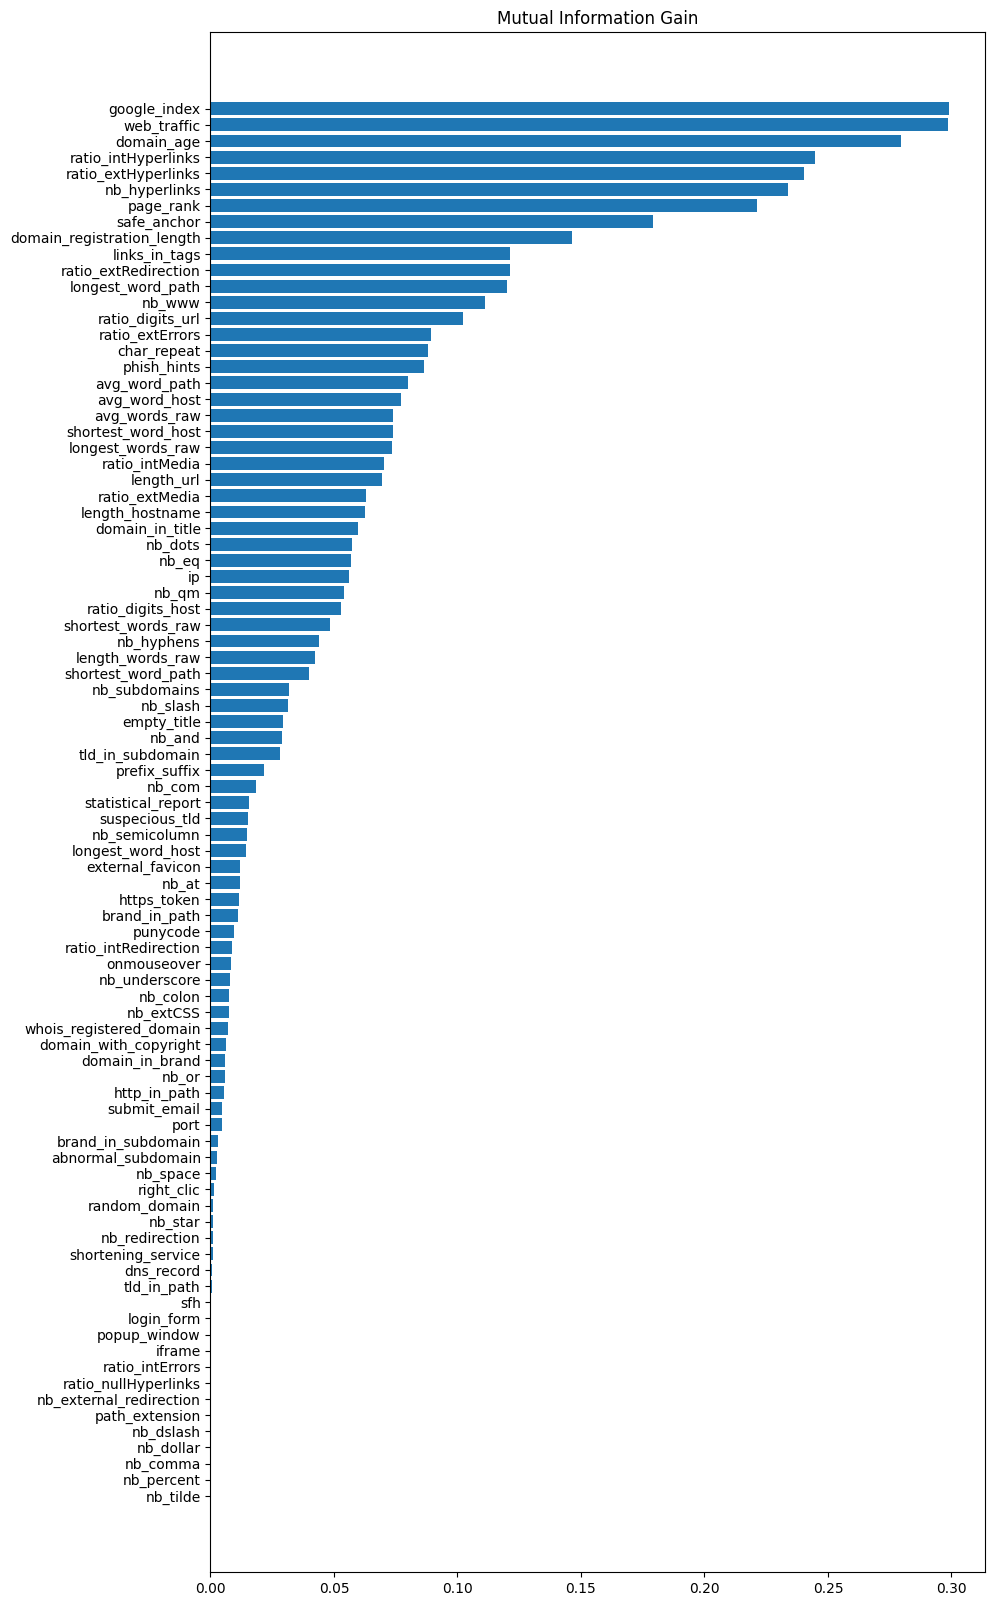

In [ ]:
plot_X = [x['name'] for x in mutualInformationValues]
plot_Y = [x['value'] for x in mutualInformationValues]
plt.figure(figsize=(10,20))
plt.barh(plot_X,plot_Y)
plt.title("Mutual Information Gain")
plt.show()

In [ ]:
kBestResults = []

In [ ]:
for k in range(2, X.shape[1]):
  X_K_best = SelectKBest(mutual_info_classif, k=k).fit_transform(X_scaled, Y)
  modelsDataFeatureSelection = {'Logistic Regression':{'model': LogisticRegression(random_state=42, max_iter=1000)},
              'Support Vector Machine': {'model': SVC(random_state=42)},
              'Gaussian Naive Bayes': {'model': GaussianNB()},
              'K-Neighbors Classifier': {'model': KNeighborsClassifier()},
              'Decision Tree': {'model': DecisionTreeClassifier(random_state=42)},
              'Random Forest': {'model': RandomForestClassifier(random_state=42)},
              'Gradiant Boosting': {'model': GradientBoostingClassifier(random_state=42)},
              'Extreme Gradient Boosting': {'model': XGBClassifier(random_state=42)},
              }
  X_train, X_test, y_train, y_test = train_test_split(X_K_best, Y, stratify=Y, test_size=0.2, random_state=42)
  for model in modelsDataFeatureSelection:
    trainAndDisplayResults(model, modelsDataFeatureSelection[model], X_train, X_test, y_train, y_test, display=False)
  kBestResults.append({'k': k, 'data': modelsDataFeatureSelection})
  print(f"Done for k {k}!")

Done for k 2!
Done for k 3!
Done for k 4!
Done for k 5!
Done for k 6!
Done for k 7!
Done for k 8!
Done for k 9!
Done for k 10!
Done for k 11!
Done for k 12!
Done for k 13!
Done for k 14!
Done for k 15!
Done for k 16!
Done for k 17!
Done for k 18!
Done for k 19!
Done for k 20!
Done for k 21!
Done for k 22!
Done for k 23!
Done for k 24!
Done for k 25!
Done for k 26!
Done for k 27!
Done for k 28!
Done for k 29!
Done for k 30!
Done for k 31!
Done for k 32!
Done for k 33!
Done for k 34!
Done for k 35!
Done for k 36!
Done for k 37!
Done for k 38!
Done for k 39!
Done for k 40!
Done for k 41!
Done for k 42!
Done for k 43!
Done for k 44!
Done for k 45!
Done for k 46!
Done for k 47!
Done for k 48!
Done for k 49!
Done for k 50!
Done for k 51!
Done for k 52!
Done for k 53!
Done for k 54!
Done for k 55!
Done for k 56!
Done for k 57!
Done for k 58!
Done for k 59!
Done for k 60!
Done for k 61!
Done for k 62!
Done for k 63!
Done for k 64!
Done for k 65!
Done for k 66!
Done for k 67!
Done for k 68!
Don

In [ ]:
accuracies = {'Logistic Regression':[],
              'Support Vector Machine': [],
              'Gaussian Naive Bayes':[],
              'K-Neighbors Classifier': [],
              'Decision Tree': [],
              'Random Forest': [],
              'Gradiant Boosting': [],
              'Extreme Gradient Boosting': [],
              }
for model in accuracies:
    for item in kBestResults:
      accuracies[model].append(item['data'][model]['metrics']['accuracy'])

In [ ]:
import numpy as np
def computeTable():
  tableBestK = PrettyTable(['Model Name', 'Scoring Function', 'Best Accuracy',
                            """Maximum No. of Features to Reach Highest Accuracy""", """Minimum No. of Features to Reach High Accuracy Margin"""])
  for model in accuracies:
    bestAccuracy = max(accuracies[model])
    bestIndex = np.argmax(accuracies[model]) + 2
    minIndex = 99999
    maxMinAccuracy = -1
    for index in range(len(accuracies[model])):
      if int(accuracies[model][index] * 100) == int(bestAccuracy * 100):
        if minIndex > index:
          minIndex = index
          maxMinAccuracy = accuracies[model][index]
    fBestAcc = format(bestAccuracy * 100, ".3f")
    fAcc = format(maxMinAccuracy * 100, ".3f")
    tableBestK.add_row([model, "mutual_info_classif", f"{fBestAcc} %", bestIndex, f"{minIndex+2} (Accuracy % : {fAcc})"], divider=True)
  print(tableBestK)

In [ ]:
computeTable()

+---------------------------+---------------------+---------------+---------------------------------------------------+-------------------------------------------------------+
|         Model Name        |   Scoring Function  | Best Accuracy | Maximum No. of Features to Reach Highest Accuracy | Minimum No. of Features to Reach High Accuracy Margin |
+---------------------------+---------------------+---------------+---------------------------------------------------+-------------------------------------------------------+
|    Logistic Regression    | mutual_info_classif |    93.745 %   |                         71                        |                37 (Accuracy % : 93.088)               |
+---------------------------+---------------------+---------------+---------------------------------------------------+-------------------------------------------------------+
|   Support Vector Machine  | mutual_info_classif |    95.801 %   |                         59                        | 